# **Cosas a tener en cuenta******

Fecha de entrega: en 2 semanas

1. Nºactuals y forecast
2. Horizonte de previsión (siempre el mismo)
3. Nºpaises y productos
4. Historico de datos actuals / forecast
5. Forecast distintos
6. Rangos de Amount

# **Visualización de datos**

**Asignatura:** Visualización de datos

**Autora:** Sandra Millán Palacios



Para este proyecto de análisis y visualización de datos de ventas, realizaremos un análisis exhaustivo que nos permita explorar y entender el comportamiento de las ventas de un conjunto de datos que comprende transacciones realizadas en distintos países, a través de varias marcas y en diferentes periodos de tiempo.Para ello nos centraremos en explorar cómo se distribuyen y evolucionan las ventas de acuerdo a varias dimensiones clave:

1. Cómo se distribuyen las ventas realizadas en:

  - Cada país
  - Cada mes y año
  - Cada marca

2. Cuál es la tendencia y estacionalidad de:

  - Todas las ventas del país con menos ventas
  - La marca con más ventas

3. Cuáles son las predicciones hechas en España y cómo de
buenas son

## **Carga la base de datos**

In [243]:
pip install plotly_express

In [244]:
# Librerías necesarias

import plotly_express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
from google.colab import files
from scipy.stats import linregress
import numpy as np

In [245]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

La base de datos proporcionada consta de 18,666 registros y 8 columnas, cada una con un propósito específico relacionado con el seguimiento de ventas en distintos países, marcas, y en un periodo de tiempo detallado:

- **COUNTRY** - Indica el país donde se realizó la venta.
- **SUBBRAND** - Especifica la sub-marca vendida.
- **YEAR** - Año en que se realizó la venta o en que se realizó una predicción.
- **MONTH** - Mes en el que ocurrió la venta o la predicción.
- **SCENARIO** - Describe si el registro corresponde a una predicción o a una observación real.
- **FORECAST** - Mes en el que se realizó la predicción.
- **FORECAST_YEAR** - Año en el que se realizó la predicción.
- **AMOUNT** - Representa el volumen de ventas en una transacción. Es la métrica principal para evaluar el rendimiento de ventas, tendencias y precisión de pronósticos.

In [246]:
# Cargar la base de datos: datos_ejercicio_ventas.csv

uploaded = files.upload()

Saving datos_ejercicio_ventas.csv to datos_ejercicio_ventas (4).csv


In [247]:
df = pd.read_csv('/content/datos_ejercicio_ventas.csv')
df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


## **Transformación de los datos**

Para comenzar el análisis de esta base de datos de ventas, primero dividiremos los registros en dos subconjuntos: uno que contenga únicamente los datos de ventas reales y otro que incluya las predicciones. Esta división facilitará un estudio detallado y específico de cada grupo de datos.

En primer lugar, ajustaremos el formato de los valores en la columna de predicciones, transformando el formato AI_P(mes)F en un valor numérico de mes. Esto permitirá una mejor interpretación temporal de las predicciones y su comparación con los datos reales. Posteriormente, realizaremos un análisis inicial mediante el cálculo de estadísticos descriptivos para los campos numéricos (año, mes y volumen de ventas) en ambos conjuntos. Esta revisión es fundamental para evaluar la coherencia y cobertura temporal de los datos, y nos permitirá verificar si los periodos de predicción se alinean con los años de datos reales disponibles. Finalmente, determinaremos el número de países y sub-marcas representados en los datos, lo cual aportará claridad sobre la complejidad y dimensión del problema de análisis y modelado.

### **Crear dos subconjuntos de datos**

Crear dos dataset: uno de actuals (real) y el otro de Al_forecast (predicción)

In [248]:
df_actual = df[df['SCENARIO'] == 'actual']
df_forecast = df[df['SCENARIO'] == 'AI_forecast']

Eliminamos la columna FORECAST Y FORECAST_YEAR de los datos reales, ya que no hya ningún mes de predicción.

In [249]:
df_actual = df_actual.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)

Vuelvo a reiniciar los indices para mayor consistencia de los datos

In [250]:
df_actual.reset_index(drop=True, inplace=True)
df_forecast.reset_index(drop=True, inplace=True)

## **Número de submarcas y países**

En total hay 9 países y 6 submarcas. En el siguiente gráfico no solo hemso mostrado el número de paises y de submarcas, sino que hemos visto si hay una cantidad de datos similares para cada representación. Podemos observar, que tenmso muy poco registros de Italia y de Mountain Dew.

In [251]:
# Calcular el total de datos en el DataFrame
total_datos = len(df_actual)

# Calcular el porcentaje de cada 'COUNTRY' y 'SUBBRAND' sobre el total de datos
df_country_pct = df_actual['COUNTRY'].value_counts(normalize=True).reset_index()
df_country_pct.columns = ['COUNTRY', 'PCT_COUNTRY']
df_country_pct['PCT_COUNTRY'] *= 100  # Convertir a porcentaje

df_subbrand_pct = df_actual['SUBBRAND'].value_counts(normalize=True).reset_index()
df_subbrand_pct.columns = ['SUBBRAND', 'PCT_SUBBRAND']
df_subbrand_pct['PCT_SUBBRAND'] *= 100  # Convertir a porcentaje

# Crear el gráfico de barras para 'COUNTRY' con porcentajes
fig_country = px.bar(df_country_pct, x='COUNTRY', y='PCT_COUNTRY', title='Porcentaje de Datos - Country', labels={'COUNTRY': 'Country', 'PCT_COUNTRY': 'Porcentaje de Datos'})
fig_country.update_traces(text=df_country_pct['PCT_COUNTRY'].round(2).astype(str) + '%', textposition='outside')

# Crear el gráfico de barras para 'SUBBRAND' con porcentajes
fig_subbrand = px.bar(df_subbrand_pct, x='SUBBRAND', y='PCT_SUBBRAND', title='Porcentaje de Datos - Subbrand', labels={'SUBBRAND': 'Subbrand', 'PCT_SUBBRAND': 'Porcentaje de Datos'})
fig_subbrand.update_traces(text=df_subbrand_pct['PCT_SUBBRAND'].round(2).astype(str) + '%', textposition='outside')

# Crear un layout de subplots y agregar ambos gráficos
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Porcentaje de Datos - Country", "Porcentaje de Datos - Subbrand"))

# Añadir gráficos al layout
fig.add_traces(fig_country['data'], rows=1, cols=1)
fig.add_traces(fig_subbrand['data'], rows=1, cols=2)

# Ajustar el diseño y mostrar
fig.update_layout(title_text="Porcentaje de Datos por Country y Subbrand", showlegend=False)
fig.show()

In [252]:
import plotly.express as px
import pandas as pd

# Calcular el total de datos en el DataFrame
total_datos = len(df_actual)

# Calcular el porcentaje de cada 'COUNTRY' y 'SUBBRAND' sobre el total de datos
df_country_pct = df_actual['COUNTRY'].value_counts(normalize=True).reset_index()
df_country_pct.columns = ['COUNTRY', 'PCT_COUNTRY']
df_country_pct['PCT_COUNTRY'] *= 100  # Convertir a porcentaje

df_subbrand_pct = df_actual['SUBBRAND'].value_counts(normalize=True).reset_index()
df_subbrand_pct.columns = ['SUBBRAND', 'PCT_SUBBRAND']
df_subbrand_pct['PCT_SUBBRAND'] *= 100  # Convertir a porcentaje

# Crear la gráfica de tarta para 'COUNTRY' con porcentajes
fig_country = px.pie(df_country_pct, names='COUNTRY', values='PCT_COUNTRY', title='Porcentaje de Datos por Country',
                     labels={'COUNTRY': 'Country', 'PCT_COUNTRY': 'Porcentaje de Datos'})
fig_country.update_traces(textinfo='percent+label', pull=[0.1 if pct < 10 else 0 for pct in df_country_pct['PCT_COUNTRY']])

# Crear la gráfica de tarta para 'SUBBRAND' con porcentajes
fig_subbrand = px.pie(df_subbrand_pct, names='SUBBRAND', values='PCT_SUBBRAND', title='Porcentaje de Datos por Subbrand',
                      labels={'SUBBRAND': 'Subbrand', 'PCT_SUBBRAND': 'Porcentaje de Datos'})
fig_subbrand.update_traces(textinfo='percent+label', pull=[0.1 if pct < 10 else 0 for pct in df_subbrand_pct['PCT_SUBBRAND']])

# Mostrar las gráficas
fig_country.show()
fig_subbrand.show()


## **Análisis de datos de predicción**

Primero, hemos convertido las columnas numéricas (FORECAST_YEAR) al formato entero. Luego, ajustamos la columna FORECAST en el subconjunto de predicciones, transformando su formato para que los meses donde se predijo la información estén representados numéricamente. Finalmente, calculamos los estadísticos básicos para las columnas numéricas en los datos reales y en las predicciones para observar la distribución de cada subconjunto.

In [253]:
# Primero hay que cambair a dos dataset
df_forecast['FORECAST_YEAR'] = df_forecast['FORECAST_YEAR'].astype(int)

<ipython-input-253-ca7a3dae5826>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
# cambiar a 12 es 1 y el resto van a su mes
import re

def extract_number(text):
    match = re.search(r'\d+', text) # Mira lo que sea texto
    if match:
        return int(match.group(0)) #Coge lo que no sea letra
    else:
        return 1  # Si no hya nada es proque es el mes enero

df_forecast['FORECAST'] = df_forecast['FORECAST'].apply(extract_number)

<ipython-input-254-3074409a2ed1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [255]:
df_forecast[['YEAR', 'MONTH', 'FORECAST', 'FORECAST_YEAR', 'AMOUNT']].describe()

,YEAR,MONTH,FORECAST,FORECAST_YEAR,AMOUNT
count,17766.000000,17766.000000,17766.000000,17766.0,1.776600e+04
mean,2023.732298,6.514860,6.802432,2023.0,9.837240e+05
std,0.590992,3.472165,3.430173,0.0,1.915109e+06
min,2023.000000,1.000000,1.000000,2023.0,0.000000e+00
25%,2023.000000,3.000000,4.000000,2023.0,8.917303e+04
50%,2024.000000,7.000000,7.000000,2023.0,3.239128e+05
75%,2024.000000,10.000000,10.000000,2023.0,1.100389e+06
max,2025.000000,12.000000,12.000000,2023.0,1.373810e+07


1. **Año de Predicción:**

Los años abarcan desde 2023 hasta 2025, con una media cercana a 2024. Esto indica que el horizonte de predicción cubre aproximadamente tres años, con una mayoría concentrada en 2023 y 2024.

2. **Mes de Predicción:**

Los valores en MONTH va de 1 a 12, cubriendo todos los meses. Esto garantiza que hay datos de predicción para todos los meses del año, permitiendo una evaluación de estacionalidad.

3. **Volumen de Ventas (AMOUNT):**

La media de ventas predichas es 983,724, pero existe una alta variabilidad (desviación estándar de 1,915,109) con valores que oscilan desde 0 hasta 13,738,100. Esto indica una amplia distribución en los volúmenes de ventas esperados, posiblemente debido a variaciones entre países, productos, o estacionalidad en el tiempo. El 0 implica que no se predijo ninguna venta (observar más adelante).

4. **Consistencia Temporal:**

El valor constante en FORECAST_YEAR (2023) sugiere que todas las predicciones se han realizado con base en los datos observados de ese año, lo cual puede ser relevante al evaluar la precisión de estos pronósticos.

**Horizonte de predicción**

El horizonte de predicción es el periodo de tiempo hacia el futuro para el cual un modelo o método de pronóstico realiza sus estimaciones. En otras palabras, es la extensión temporal que cubre la predicción, definida en unidades de tiempo como días, meses, trimestres o años. En nuestro caso se basa en meses.

Para ello, hay que tener en cuanta que hablamos de una sub-marca, en un lugar, y con la predicción qu ese haya hecho en un mes en particular.

El horizonte de predicción conincide para todas las marcas, paises y mes en el que se hizo la predicción.

In [256]:
# Sacar el horizonte de predicción

def horizonte(df):
  i = 0
  for year in range(2023, 2026, 1):
    df_year = df[df['YEAR'] == year]
    for month in range(1, 13, 1):
      if month in df_year['MONTH'].values:
        i = i + 1
  return i

In [257]:
print(f'El horizonte de predicción es de {horizonte(df_forecast[(df_forecast["SUBBRAND"] == "Lipton (L3)") & (df_forecast["COUNTRY"] == "Spain") & (df_forecast["FORECAST"] == 1)])} meses : Lipton')


El horizonte de predicción es de 18 meses : Lipton


In [258]:
print(f'El horizonte de predicción es de {horizonte(df_forecast[(df_forecast["SUBBRAND"] == "7up (L3)") & (df_forecast["COUNTRY"] == "Spain") & (df_forecast["FORECAST"] == 1) & (df_forecast["FORECAST"] == 1)])} meses: 7up')

El horizonte de predicción es de 18 meses: 7up


**¿Existen varias predicciones de una misma marca en un mismo pais y para un solo mes? PREGUNTAR *********

A continuación, realizaremos una comparación detallada de las predicciones para el mes de enero de 2024 de la compañía Lipton en España, con el objetivo de evaluar la precisión y evolución de estas proyecciones. Para ello:

- **Predicciones para enero de 2024 realizadas a lo largo de 2023:** Dibujaremos las predicciones realizadas para enero de 2024 en cada uno de los meses de 2023, lo que permitirá observar cómo se han ajustado estas estimaciones a medida que se disponía de más datos reales durante el año. Este análisis mostrará si las proyecciones han sido consistentes o si han variado significativamente con el tiempo.

- **Datos reales de 2023:** Incluir los datos reales de ventas mensuales de 2023 permitirá contextualizar la precisión de las predicciones. Al comparar estos valores con las proyecciones para enero de 2024, podremos ver si el modelo ha incorporado de manera efectiva los patrones y tendencias observadas durante el año anterior.

- **Valor real de enero de 2024:** Finalmente, compararemos estas predicciones con el valor real de ventas en enero de 2024. Esto nos permitirá evaluar si los ajustes realizados en las proyecciones a lo largo de 2023 han llevado a una predicción acertada o si existe una discrepancia significativa.

In [259]:
df_forecast[(df_forecast["SUBBRAND"] == "Lipton (L3)") & (df_forecast["COUNTRY"] == "Spain") & (df_forecast["MONTH"] == 1) & (df_forecast["YEAR"] == 2024)].sort_values(by="FORECAST")


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
16045,Spain,Lipton (L3),2024,1,AI_forecast,1,2023,6767.738848
16297,Spain,Lipton (L3),2024,1,AI_forecast,2,2023,6647.360590
4900,Spain,Lipton (L3),2024,1,AI_forecast,3,2023,12574.943641
2146,Spain,Lipton (L3),2024,1,AI_forecast,4,2023,12171.089747
16279,Spain,Lipton (L3),2024,1,AI_forecast,5,2023,13248.727321
310,Spain,Lipton (L3),2024,1,AI_forecast,6,2023,12670.573620
4379,Spain,Lipton (L3),2024,1,AI_forecast,7,2023,12820.182303
3284,Spain,Lipton (L3),2024,1,AI_forecast,8,2023,12124.669695
16167,Spain,Lipton (L3),2024,1,AI_forecast,9,2023,11704.779148
8460,Spain,Lipton (L3),2024,1,AI_forecast,10,2023,13480.829252


In [260]:
df_actual[(df_actual["SUBBRAND"] == "Lipton (L3)") & (df_actual["COUNTRY"] == "Spain") & (df_actual["YEAR"] == 2023)].sort_values(by="MONTH")

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT
769,Spain,Lipton (L3),2023,1,actual,9208.979380
548,Spain,Lipton (L3),2023,2,actual,10132.837982
336,Spain,Lipton (L3),2023,3,actual,9426.005681
495,Spain,Lipton (L3),2023,4,actual,9617.009842
198,Spain,Lipton (L3),2023,5,actual,11759.247228
282,Spain,Lipton (L3),2023,6,actual,11845.311400
884,Spain,Lipton (L3),2023,7,actual,13255.914482
722,Spain,Lipton (L3),2023,8,actual,16355.798252
570,Spain,Lipton (L3),2023,9,actual,10634.289343
345,Spain,Lipton (L3),2023,10,actual,10942.085510


In [261]:
# Filtrar prediccion hecha para enero, relaizada en todos los meses del 2023
predic_enero = df_forecast[
    (df_forecast["COUNTRY"] == "Spain") &
    (df_forecast["SUBBRAND"] == "Lipton (L3)") &
    (df_forecast["YEAR"] == 2024) &
    (df_forecast["MONTH"] == 1)
].sort_values(by="FORECAST")

# Filtrar prediccion hecha para enero, relaizada en todos los meses del 2023
real_2023 = df_actual[
    (df_actual["COUNTRY"] == "Spain") &
    (df_actual["SUBBRAND"] == "Lipton (L3)") &
    (df_actual["YEAR"] == 2023)
].sort_values(by="MONTH")

# Filtrar los índices que cumplen con las condiciones especificadas
indices_valor1_24 = df_actual.index[
    (df_actual["COUNTRY"] == "Spain") &
    (df_actual["SUBBRAND"] == "Lipton (L3)") &
    (df_actual["YEAR"] == 2023) &
    (df_actual["MONTH"] == 1)
]

value = int(df_actual.loc[161, 'AMOUNT'])

In [262]:
# Crear la figura
fig = go.Figure()

# Agregar la línea de predicciones para 1/24
fig.add_trace(go.Scatter(
    x=predic_enero["FORECAST"],
    y=predic_enero["AMOUNT"],
    mode='lines',
    name='Predicciones para 1/24',
    line=dict(color='blue', width=2)
))

# Agregar la línea de datos reales para 2023
fig.add_trace(go.Scatter(
    x=real_2023["MONTH"],
    y=real_2023["AMOUNT"],
    mode='lines',
    name='Real del 2023',
    line=dict(color='green', width=2)
))

# Agregar la línea horizontal para el valor real de 1/24
fig.add_hline(
    y=value,
    line_color="red",
    line_dash="dot",
    line_width=2,
    name="Valor real de 1/24"
)

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='lines',
    line=dict(color='red', dash='dot', width=2),
    name="Valor real de 1/24"
))

# Configurar el diseño de la leyenda y etiquetas
fig.update_layout(
    title="Time Series for Spain, Lipton (L3) para 2024",
    xaxis_title="Forecast Month",
    yaxis_title="Amount",
    legend_title="Series",
    legend=dict(
        title_font_size=12,
        font_size=10,
        bordercolor="Black",
        borderwidth=1,
        bgcolor="LightGray"
    )
)

# Mostrar la gráfica
fig.show()


**Vamos a crear la columna Fecha**

Para poder visulizar correctamente las series temporales.

In [263]:
df_forecast['Fecha'] = pd.to_datetime(df_forecast[['YEAR', 'MONTH']].assign(DAY=1))
df_forecast = df_forecast.sort_values(by="Fecha")

<ipython-input-263-1fb03de728ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Análisis de datos reales**

Vamos a analizar si los datos son consistentes o si, en cambio, puede haber algún tipo de error en ellos. Observamos que existen cantidades negativas, lo cual solo tendría sentido si representaran pérdidas. A continuación, examinaremos cuántos datos presentan valores negativos y evaluaremos si tienen coherencia en el contexto de los datos.

In [264]:
df_actual[['YEAR', 'MONTH', 'AMOUNT']].describe()

,YEAR,MONTH,AMOUNT
count,900.000000,900.000000,9.000000e+02
mean,2023.402222,5.697778,7.443485e+05
std,0.490619,3.194440,1.905511e+06
min,2023.000000,1.000000,-2.171201e+05
25%,2023.000000,3.000000,5.574319e+04
50%,2023.000000,5.500000,1.856788e+05
75%,2024.000000,8.000000,6.432082e+05
max,2024.000000,12.000000,1.481563e+07


**Vamos a crear la columna Fecha**

Para poder visulizar correctamente las series temporales.

In [265]:
df_actual['Fecha'] = pd.to_datetime(df_actual[['YEAR', 'MONTH']].assign(DAY=1))
df_actual = df_actual.sort_values(by="Fecha")

### **Datos negativos**

Vemos si los datos son coherentes

In [266]:
df_actual[df_actual['AMOUNT'] < 0]

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,Fecha
539,Hungary,7up (L3),2023,7,actual,-6332.708713,2023-07-01
569,Norway,Lipton (L3),2023,9,actual,-217120.103133,2023-09-01
317,Hungary,7up (L3),2023,9,actual,-19481.652378,2023-09-01
417,Hungary,7up (L3),2023,11,actual,-13549.371551,2023-11-01
682,Hungary,7up (L3),2023,12,actual,-10.791926,2023-12-01
363,Hungary,7up (L3),2024,1,actual,-188.474017,2024-01-01
823,Hungary,7up (L3),2024,2,actual,-1.394871,2024-02-01
750,Norway,Lipton (L3),2024,3,actual,-173.296795,2024-03-01
382,Norway,Lipton (L3),2024,7,actual,-3177.460145,2024-07-01
858,Norway,Lipton (L3),2024,8,actual,-2435.665326,2024-08-01


Tampoco tiene sentido estos datos, poruqe no se puede vender un 0.44 cantidades de algo

In [267]:
df_actual[(df_actual['AMOUNT'] < 100) & (df_actual['AMOUNT'] > 0)]

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,Fecha
610,Norway,Lipton (L3),2024,2,actual,73.968144,2024-02-01
165,Czech,7up Free (L3),2024,2,actual,89.354912,2024-02-01
40,Hungary,7up (L3),2024,4,actual,5.575874,2024-04-01
171,Hungary,7up (L3),2024,7,actual,1.394828,2024-07-01
174,Czech,7up (L3),2024,7,actual,45.798609,2024-07-01
236,Czech,7up (L3),2024,8,actual,0.443809,2024-08-01


A continuación, se procede a visualizar los datos de 7up en Hungría y los datos de Lipton en Norway:

- Podría tener sentido si estamso hablando de que se está intentnado de priemras un porducto, y vemos si el cleinte o público lo acoje o no. En este caso, podemos ver como en Noruega se intento y en Hungría fue desaprenciendo.Con la conlusión, de que no se venderían más de esos productos. Sin embargo, no llega a tener fundamento y nos paortará al análisis, por lo que se procede a eliminarlo.

<ipython-input-268-de4a17b1d1f5>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-268-de4a17b1d1f5>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



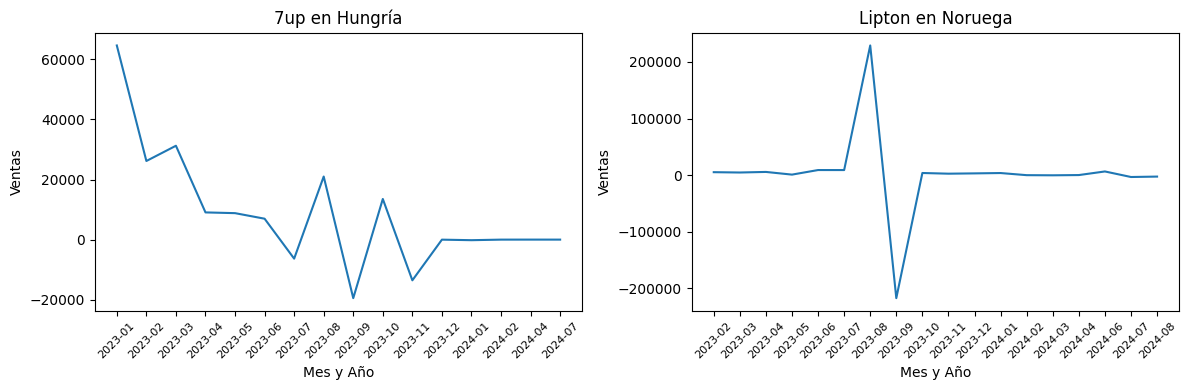

In [268]:
# A continuación, se procede a visualizar los datos de 7up en Hungría y los datos de Lipton en Norway

# Filtrar los datos de 7up en Hungría
df_7up_hungary = df_actual[(df_actual["SUBBRAND"] == "7up (L3)") & (df_actual["COUNTRY"] == "Hungary")]

# Filtrar los datos de Lipton en Norway
df_lipton_norway = df_actual[(df_actual["SUBBRAND"] == "Lipton (L3)") & (df_actual["COUNTRY"] == "Norway")]

# Convertir las fechas para mostrar solo el mes y el año
df_7up_hungary["Fecha"] = pd.to_datetime(df_7up_hungary["Fecha"]).dt.to_period("M").astype(str)
df_lipton_norway["Fecha"] = pd.to_datetime(df_lipton_norway["Fecha"]).dt.to_period("M").astype(str)

# Crear la figura y los ejes para la subgráfica
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Visualizar los datos de 7up en Hungría
axes[0].plot(df_7up_hungary["Fecha"], df_7up_hungary["AMOUNT"])
axes[0].set_title("7up en Hungría")
axes[0].set_xlabel("Mes y Año")
axes[0].set_ylabel("Ventas")
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Ajustar tamaño y rotación de etiquetas

# Visualizar los datos de Lipton en Noruega
axes[1].plot(df_lipton_norway["Fecha"], df_lipton_norway["AMOUNT"])
axes[1].set_title("Lipton en Noruega")
axes[1].set_xlabel("Mes y Año")
axes[1].set_ylabel("Ventas")
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Ajustar tamaño y rotación de etiquetas

# Mejorar el espaciado entre subgráficas
plt.tight_layout()
plt.show()


In [269]:
# Eliminar registros de 7up (L3) en Hungría y Lipton (L3) en Noruega
df_actual = df_actual[~((df_actual['SUBBRAND'] == '7up (L3)') & (df_actual['COUNTRY'] == 'Hungary'))]
df_actual = df_actual[~((df_actual['SUBBRAND'] == 'Lipton (L3)') & (df_actual['COUNTRY'] == 'Norway'))]


In [270]:
df_actual.reset_index(drop=True, inplace=True)

### **Datos cercanos a cero**

En el anterior caso, hemos detectado que hay Amounts insignificantes, que se deberían estudiar antes de proceder a cualquier conclusión. Como podemos ver, si tiene sentido la cantidad cercana cero implicando el declive de la marca en lso últimos días.

<ipython-input-271-c3c777fa21a0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



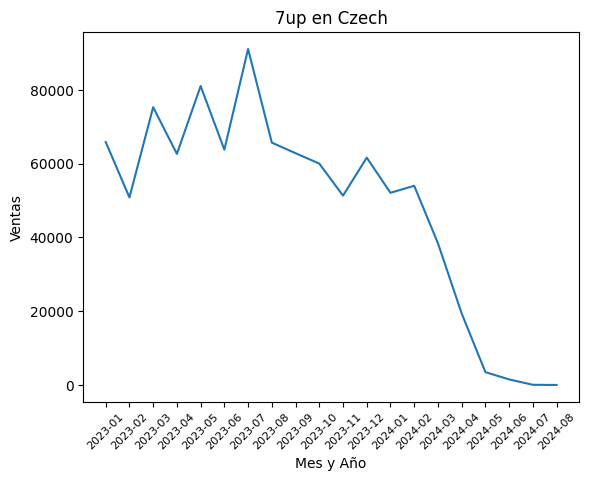

In [271]:
# Filtrar los datos de 7up en Czech
df_7up_Czech = df_actual[(df_actual["SUBBRAND"] == "7up (L3)") & (df_actual["COUNTRY"] == "Czech")]

# Convertir las fechas para mostrar solo el mes y el año
df_7up_Czech["Fecha"] = pd.to_datetime(df_7up_Czech["Fecha"]).dt.to_period("M").astype(str)

# Visualizar los datos de 7up en Hungría
plt.plot(df_7up_Czech["Fecha"], df_7up_Czech["AMOUNT"])
plt.title("7up en Czech")
plt.xlabel("Mes y Año")
plt.ylabel("Ventas")
plt.tick_params(axis='x', rotation=45, labelsize=8)

## **Distribución de los datos**

- Pais con más ventas: Gran Bretaña
- Pais con menos ventas: Spain
- Marca con más ventas: Pepsi Max
- Marca con menos ventas: Mountain Dew

### **Datos máximos y distribución de países y submarcas**

Ahora vamso a ver cuales son las máximas cantidades por países y por marcas, para ello vasmoa a utilizar un gráfico de bigotes para mostrar la distribución de los datos, identificar cuales son los datos máximos y estadísiticos básicos como los cartiles.

In [272]:
# Crear una figura de subplots con Plotly
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Distribución de Amount por Country", "Distribución de Amount por Subbrand"))

# Primer gráfico: Distribución de Amount por Country
fig_country = px.box(df_actual, x='COUNTRY', y='AMOUNT', title="Distribución de Amount por Country")
for trace in fig_country.data:
    fig.add_trace(trace, row=1, col=1)

# Segundo gráfico: Distribución de Amount por Subbrand
fig_subbrand = px.box(df_actual, x='SUBBRAND', y='AMOUNT', title="Distribución de Amount por Subbrand")
for trace in fig_subbrand.data:
    fig.add_trace(trace, row=1, col=2)

# Ajustar el diseño de la figura
fig.update_layout(
    title="Distribución de Amount por Country y Subbrand",
    xaxis=dict(tickangle=45),  # Rotar etiquetas en el primer gráfico
    xaxis2=dict(tickangle=45),  # Rotar etiquetas en el segundo gráfico
    width=1000,
    height=600,
    showlegend=False
)

# Mostrar la gráfica
fig.show()

En la gráfica de la columna de países, **Gran Bretaña** se destaca con una distribución de ventas que incluye valores extremadamente altos en comparación con los otros países. Observamos que la caja de distribución de Gran Bretaña tiene un rango intercuartil amplio, lo que indica variabilidad en las ventas medianas. Además, existen varios valores atípicos que superan los 10 millones, llegando hasta aproximadamente 14 millones, lo que resalta la importancia de Gran Bretaña como un mercado significativo con picos de ventas muy altos.

En la gráfica de la columna de marcas, **Pepsi Max (L3)** muestra una distribución de ventas considerablemente amplia. Su rango intercuartil es uno de los mayores entre todas las marcas, indicando una gran variabilidad en el volumen de ventas. La mediana se sitúa en una posición elevada en comparación con otras marcas, lo que sugiere que, en promedio, las ventas de Pepsi Max son consistentemente altas. Además, existen outliers en el rango superior, algunos alcanzando hasta 14 millones, lo que confirma que Pepsi Max experimenta picos de demanda en ciertos períodos, unicamnete en el país de Gran Bretaña.


**Pepsi y Gran bretaña**

Observamos que existen valores atípicos asociados al Reino Unido, especialmente relacionados con la marca Pepsi Max. Aunque es comprensible que haya diferencias debido a la mayor población del Reino Unido (68.35 millones) en comparación con la de España (48.37 millones), la magnitud de esta discrepancia es considerablemente excesiva. La variación supera los 10^7 mienstres que el resto oscilan en torno al valor de 10^6, lo cual no se ajusta a una diferencia poblacional plausible, sino que indica la presencia de datos fuera de escala. Estos registros serán considerados como *outliers* y eliminados temporalemnte para favorecer la visualización de la distribución de los datos, en marcas y países.


In [273]:
# Filtrar los datos de Pepsi Max en Great Britain
df_max_GB = df_actual[(df_actual["SUBBRAND"] == "Pepsi Max (L3)") & (df_actual["COUNTRY"] == "Great Britain")]

# Convertir las fechas para mostrar solo el mes y el año
df_max_GB["Fecha"] = pd.to_datetime(df_max_GB["Fecha"]).dt.to_period("M").astype(str)

# Crear la gráfica de líneas
fig = px.line(df_max_GB, x="Fecha", y="AMOUNT", title="Pepsi Max en Gran Bretaña", labels={"Fecha": "Mes y Año", "AMOUNT": "Ventas"})

# Ajustar el diseño de las etiquetas de fecha
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Mostrar la gráfica
fig.show()

<ipython-input-273-417c37306c05>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Distribución de ventas por países paises**

Al analizar la distribución de las ventas por país y sub-marca sin incluir a Gran Bretaña, se confirma que este último tiene las ventas más altas. Sin embargo, observamos que países como Noruega tienen en general ventas bajas, con excepción de algunos casos específicos como las ventas de *Pepsi Max*, que se destacan. En este contexto, el máximo de ventas en Noruega, sin contar a *Pepsi Max*, apenas alcanza las 238,323 unidades. Un patrón similar se observa en Dinamarca, donde el máximo sin *Pepsi* llega a 394,678 ventas. En el caso de España, el volumen medio de ventas es el más bajo de todos los países, probablemente debido a una preferencia de los consumidores por la marca Coca-Cola.

Para el resto de los países, la distribución indica una alta concentración de ventas en rangos bajos (miles de unidades), mientras que los valores más dispersos se encuentran en los cuartiles superiores. Esto podría sugerir que las ventas en millones no son frecuentes en todos los meses, ya que dependen de múltiples factores como la estacionalidad, situación económica o celebraciones. La popularidad de ciertos productos, como los de la marca *Pepsi*, también influye en estas variaciones, reflejando cómo la marca tiene un impacto notable en los volúmenes de venta en algunos mercados.

In [274]:
df_no_british = df_actual[~(df_actual["COUNTRY"] == "Great Britain")]
df_no_pepsi = df_actual[~(df_actual["SUBBRAND"] == "Pepsi Max (L3)")]

In [275]:
# Crear una figura de subplots con Plotly
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Distribución de Amount por Country", "Distribución de Amount por Subbrand"))

# Primer gráfico: Distribución de Amount por Country
fig_country = px.box(df_no_british, x='COUNTRY', y='AMOUNT', title="Distribución de Amount por Country")
for trace in fig_country.data:
    fig.add_trace(trace, row=1, col=1)

# Segundo gráfico: Distribución de Amount por Subbrand
fig_subbrand = px.box(df_no_pepsi, x='SUBBRAND', y='AMOUNT', title="Distribución de Amount por Subbrand")
for trace in fig_subbrand.data:
    fig.add_trace(trace, row=1, col=2)

# Puntos individuales solo para Pepsi
df_pepsi = df_no_british[df_no_british["SUBBRAND"].str.contains("Pepsi", case=False)]
fig.add_trace(
    go.Scatter(
        x=df_pepsi["COUNTRY"],
        y=df_pepsi["AMOUNT"],
        mode='markers',
        name='Datos Pepsi',
        marker=dict(color='red', size=6, opacity=0.6)
    ),
    row=1, col=1
)

# Ajustar el diseño de la figura
fig.update_layout(
    title="Distribución de Amount por Country y Subbrand",
    xaxis=dict(tickangle=45),  # Rotar etiquetas en el primer gráfico
    xaxis2=dict(tickangle=45),  # Rotar etiquetas en el segundo gráfico
    width=1000,
    height=600,
    showlegend=False
)

# Mostrar la gráfica
fig.show()

### **Distirbución de meses y años**

In [276]:
# Agrupar los datos por mes/año y marca, sumando la cantidad
df_grouped = df_actual.groupby(["Fecha", "SUBBRAND"])["AMOUNT"].sum().reset_index()

# Crear el histograma
fig = px.bar(df_grouped, x="Fecha", y="AMOUNT", color="SUBBRAND", title="Cantidad por Marca en cada Mes y Año",
             labels={"Fecha": "Fecha", "AMOUNT": "Cantidad", "SUBBRAND": "Marca"})

# Ajustar el diseño para una mejor visualización
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotar etiquetas para legibilidad
    barmode='stack'            # Apilar las barras para ver el total por mes/año
)

# Mostrar la gráfica
fig.show()

Observamos que Pepsi Max (L3) (en color naranja) es consistentemente la marca con la mayor cantidad de ventas en la mayoría de los meses, con una contribución significativa al total mensual. Pepsi Regular (L3) (en color azul claro) también mantiene una presencia notable, posicionándose generalmente como la segunda mayor contribuyente en cada mes. Las otras marcas, como 7up (L3), 7up Free (L3), Lipton (L3), y Mountain Dew (L3), muestran contribuciones menores en comparación, con cantidades de ventas más reducidas y menos variabilidad entre los meses.

Enero se destaca consistentemente como una época de ventas bajas, mostrando los valores más reducidos en comparación con otros meses del año. Esta tendencia podría asociarse con un período de menor consumo después de las festividades de fin de año, cuando la demanda disminuye.

Por otro lado, agosto se presenta como la época alta, con un aumento notable en las ventas totales. Este incremento es evidente en la altura de las barras en comparación con otros meses, reflejando un repunte en el consumo, probablemente debido a las vacaciones de verano y el clima cálido en muchas regiones, que tiende a estimular el consumo de bebidas. Este patrón de baja en enero y alza en agosto se repite en ambos años observados, sugiriendo una estacionalidad consistente en la demanda de estas marcas a lo largo del tiempo.


## **Tendencia y estacionalidad**

La **tendencia** refleja la dirección general de crecimiento o decrecimiento en una serie temporal a lo largo del tiempo, mientras que la **estacionalidad** muestra patrones cíclicos y recurrentes en intervalos regulares, influenciados por factores externos como el clima o eventos específicos.

### **País con menos ventas**

In [277]:
def menos_ventas(df, columna_pais, columna_ventas):
    # Calcular las ventas promedio y totales por país
    ventas_por_pais = df.groupby(columna_pais)[columna_ventas].agg(['mean', 'sum'])

    # Encontrar el país con la menor venta promedio
    pais_menor_media = ventas_por_pais['mean'].idxmin()
    menor_media = ventas_por_pais['mean'].min()

    # Encontrar el país con la menor venta total
    pais_menor_total = ventas_por_pais['sum'].idxmin()
    menor_total = ventas_por_pais['sum'].min()

    # Retornar los resultados en un diccionario
    return {
        "Pais: Menor venta promedio": (pais_menor_media, menor_media),
        "Pais: Menor venta total": (pais_menor_total, menor_total)
    }

In [278]:
def mas_ventas(df, columna_pais, columna_ventas):
    # Calcular las ventas promedio y totales por país
    ventas_por_pais = df.groupby(columna_pais)[columna_ventas].agg(['mean', 'sum'])

    # Encontrar el país con la menor venta promedio
    pais_menor_media = ventas_por_pais['mean'].idxmax()
    menor_media = ventas_por_pais['mean'].max()

    # Encontrar el país con la menor venta total
    pais_menor_total = ventas_por_pais['sum'].idxmax()
    menor_total = ventas_por_pais['sum'].max()

    # Retornar los resultados en un diccionario
    return {
        "Marca: Mas venta promedio": (pais_menor_media, menor_media),
        "Marca: Mas venta total": (pais_menor_total, menor_total)
    }

In [279]:
resultado = menos_ventas(df_actual, "COUNTRY", "AMOUNT")
print(resultado)

{'Pais: Menor venta promedio': ('Spain', 81312.65977520084), 'Pais: Menor venta total': ('Spain', 8131265.977520084)}


In [280]:
resultado = mas_ventas(df_actual, "SUBBRAND", "AMOUNT")
print(resultado)

{'Marca: Mas venta promedio': ('Pepsi Max (L3)', 2203881.503521208), 'Marca: Mas venta total': ('Pepsi Max (L3)', 396698670.6338175)}


### **España: menor venta**

In [281]:
df_spain = df_actual[df_actual['COUNTRY'] == 'Spain'].groupby('Fecha')['AMOUNT'].sum().reset_index()

# Cálculo de la tendencia
x = np.arange(len(df_spain))
y = df_spain['AMOUNT'].values
pendiente, intercepto, _, _, _ = linregress(x, y)
tendencia = pendiente * x + intercepto

# Creación del gráfico original
fig = px.line(df_spain, x='Fecha', y='AMOUNT', title='Tendencia y estacionalidad para España (mínima marca)',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Cantidad de ventas'})
fig.update_traces(marker=dict(size=10))  # Ajuste del tamaño de los marcadores

# Añadimos la línea de tendencia como línea discontinua
fig.add_trace(go.Scatter(
    x=df_spain['Fecha'],
    y=tendencia,
    mode='lines',
    name='Tendencia',
    line=dict(color='red', dash='dash')  # Línea roja discontinua
))

# Mostrar el gráfico
fig.show()

**Análisis de la Tendencia**

La línea de tendencia roja discontinua tiene una pendiente ascendente, lo que sugiere un crecimiento gradual de las ventas de la marca PepsiCo, que comprende las 6 submarcas anteriores en Europa, en España a lo largo del tiempo. Al formar parte de la misma marca, se analiza como la suma de las ventas.
Aunque el crecimiento no es pronunciado, se observa que, en promedio, las ventas han estado aumentando. Esta tendencia ascendente implica que la demanda de esta marca podría estar ganando popularidad en el mercado español o que ciertos factores están favoreciendo el incremento de las ventas, como campañas de marketing, cambios en las preferencias de los consumidores o eventos estacionales recurrentes que favorecen las ventas.

**Análisis de la Estacionalidad**

Observando la línea azul de las ventas mensuales, se puede identificar un comportamiento estacional claro, con picos altos y bajos recurrentes en determinados períodos del año. Este patrón sugiere que las ventas están influenciadas por factores estacionales específicos. Algunos puntos clave incluyen:

- Picos altos en verano (Julio y Agosto): En ambos años analizados, las ventas alcanzan sus niveles más altos en julio y agosto, con el punto máximo en julio de 2023, donde superan las 550,000 unidades. Este aumento coincide con los meses más cálidos, lo que probablemente favorece el consumo de bebidas, impulsando así la demanda.

- Picos bajos en invierno (Enero y Febrero): En contraste, los niveles de ventas más bajos se observan consistentemente en enero y febrero de cada año. En el período de diciembre 2023 a enero 2024, las ventas caen por debajo de las 400,000 unidades, probablemente debido a una reducción en el consumo después de las festividades, cuando los consumidores tienden a ajustar sus gastos.

- Patrón de recuperación en verano: Al acercarse el verano de 2024, las ventas comienzan a aumentar nuevamente, reflejando un patrón estacional similar al del año anterior. Esto refuerza la influencia de factores climáticos y vacacionales en la demanda, con un volumen de ventas significativamente mayor en los meses cálidos.

### **Pepsi Max (L3): máxima venta**

In [282]:
df_pepsi = df_actual[df_actual['SUBBRAND'] == 'Pepsi Max (L3)'].groupby('Fecha')['AMOUNT'].sum().reset_index()

# Cálculo de la tendencia
x = np.arange(len(df_pepsi))
y = df_pepsi['AMOUNT'].values
pendiente, intercepto, _, _, _ = linregress(x, y)
tendencia = pendiente * x + intercepto

# Creación del gráfico original
fig = px.line(df_pepsi, x='Fecha', y='AMOUNT', title='Tendencia y estacionalidad para Pepsi Max (máxima venta)',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Cantidad de ventas'})
fig.update_traces(marker=dict(size=10))  # Ajuste del tamaño de los marcadores

# Añadimos la línea de tendencia como línea discontinua
fig.add_trace(go.Scatter(
    x=df_pepsi['Fecha'],
    y=tendencia,
    mode='lines',
    name='Tendencia',
    line=dict(color='red', dash='dash')  # Línea roja discontinua
))

# Mostrar el gráfico
fig.show()

**Tendencia ascendente:**

Se aprecia claramente una tendencia positiva en el número de ventas. La línea de tendencia roja discontinua muestra una pendiente ascendente, lo que sugiere un crecimiento consistente en la demanda de Pepsi Max a lo largo del tiempo. Este patrón indica una expansión en el mercado o una popularidad creciente de la marca, posiblemente impulsada por factores como el posicionamiento en el mercado y estrategias de marketing.

**Estacionalidad trimestral:**

A pesar de la cantidad limitada de datos, se evidencia una estacionalidad de naturaleza trimestral. Los picos de ventas ocurren aproximadamente cada tres meses, seguidos de caídas abruptas que llegan a un mínimo antes de un nuevo repunte. Los puntos altos se observan en los meses de enero, abril, julio y octubre, lo que sugiere un patrón estacional recurrente vinculado a ciclos trimestrales.

## **Errores de predicción**

- Sales Amount over Time for {subbrand} (Spain)
- Porcentaje de la desviación estandar del error de predicción por marca
- Desviación estandar de la predicción en función de la diferencia temporal

In [293]:
df_spain_act = df_actual[df_actual['COUNTRY'] == 'Spain']
df_spain_for = df_forecast[df_forecast['COUNTRY'] == 'Spain']

df_spain_for['FechaReal'] = pd.to_datetime(df_spain_for.rename(columns={'FORECAST_YEAR': 'year', 'FORECAST': 'month'}).assign(day=1)[['year', 'month', 'day']])

<ipython-input-293-7f6873d9ae0e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [329]:
# Assuming df_spain_for has columns 'FechaReal' and 'Fecha'
df_spain_for['Diferencia_Fechas'] = (df_spain_for['Fecha'] - df_spain_for['FechaReal']).dt.days / 30.44
df_spain_for['Diferencia_Fechas'] = df_spain_for['Diferencia_Fechas'].round()  # Redondear a meses completos

<ipython-input-329-283d0534aaff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-329-283d0534aaff>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [332]:
import pandas as pd
import plotly.graph_objects as go

def plot_sales_forecast_vs_actual(df_actual, df_forecast, subbrand):
    """
    Genera una gráfica de ventas comparando los datos de predicción y los datos reales para una sub-marca específica.

    Args:
        df_actual (DataFrame): DataFrame con los datos reales de ventas.
        df_forecast (DataFrame): DataFrame con los datos de predicción de ventas.
        subbrand (str): La sub-marca para la cual se generará la gráfica (e.g., 'Pepsi Max (L3)').
    """
    # Filtrar los datos para la sub-marca específica
    df_marca_act = df_actual[df_actual['SUBBRAND'] == subbrand]
    df_marca_for = df_forecast[df_forecast['SUBBRAND'] == subbrand]

    # Calcular la media de ventas por fecha en el DataFrame de predicción
    mean_amount_per_date = df_marca_for.groupby('Fecha')['AMOUNT'].mean().reset_index()

    # Dividir las predicciones en corto y largo plazo
    forecast_corto = df_marca_for[df_marca_for['Diferencia_Fechas'] < 3]
    forecast_largo = df_marca_for[df_marca_for['Diferencia_Fechas'] >= 3]

    # Crear la figura de la gráfica
    fig = go.Figure()

    # Añadir puntos de ventas predichas
    fig.add_trace(go.Scatter(x=forecast_corto['Fecha'], y=forecast_corto['AMOUNT'],
                            mode='markers', name='AI Forecast  corto', marker=dict(color='blue', size=2)))

    fig.add_trace(go.Scatter(x=forecast_largo['Fecha'], y=forecast_largo['AMOUNT'],
                            mode='markers', name='AI Forecast largo', marker=dict(color='black', size=1)))

    # Añadir la línea de la media de ventas por fecha en las predicciones
    fig.add_trace(go.Scatter(x=mean_amount_per_date['Fecha'], y=mean_amount_per_date['AMOUNT'],
                             mode='lines', name='Media de Ventas por Fecha Predicha', line=dict(color='red')))

    # Añadir la línea de ventas reales por fecha
    fig.add_trace(go.Scatter(x=df_marca_act['Fecha'], y=df_marca_act['AMOUNT'],
                             mode='lines', name='Ventas por Fecha Real', line=dict(color='green')))

    # Configuración del diseño del gráfico
    fig.update_layout(title=f'Sales Amount over Time for {subbrand} in Spain',
                      xaxis_title='Date', yaxis_title='Amount')

    # Mostrar el gráfico
    fig.show()

# Ejemplo de uso
plot_sales_forecast_vs_actual(df_spain_act, df_spain_for, 'Pepsi Max (L3)')


In [333]:
plot_sales_forecast_vs_actual(df_spain_act, df_spain_for, 'Lipton (L3)')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def plot_sales_forecast_vs_actualc(df_actual, df_forecast, subbrand):
    """
    Genera una gráfica de ventas comparando los datos de predicción y los datos reales para una sub-marca específica.

    Args:
        df_actual (DataFrame): DataFrame con los datos reales de ventas.
        df_forecast (DataFrame): DataFrame con los datos de predicción de ventas.
        subbrand (str): La sub-marca para la cual se generará la gráfica (e.g., 'Pepsi Max (L3)').
    """
    # Filtrar los datos para la sub-marca específica
    df_marca_act = df_actual[df_actual['SUBBRAND'] == subbrand]
    df_marca_for = df_forecast[df_forecast['SUBBRAND'] == subbrand]

    # Calcular la media de ventas por fecha en el DataFrame de predicción
    mean_amount_per_date = df_marca_for.groupby('Fecha')['AMOUNT'].mean().reset_index()

    # Crear la figura de la gráfica
    fig = go.Figure()

    # Añadir puntos de ventas predichas
    fig.add_trace(go.Scatter(x=df_marca_for['Fecha'], y=df_marca_for['AMOUNT'],
                             mode='markers', name='AI Forecast', marker=dict(color='blue', size=1)))

    # Añadir la línea de la media de ventas por fecha en las predicciones
    fig.add_trace(go.Scatter(x=mean_amount_per_date['Fecha'], y=mean_amount_per_date['AMOUNT'],
                             mode='lines', name='Media de Ventas por Fecha Predicha', line=dict(color='red')))

    # Añadir la línea de ventas reales por fecha
    fig.add_trace(go.Scatter(x=df_marca_act['Fecha'], y=df_marca_act['AMOUNT'],
                             mode='lines', name='Ventas por Fecha Real', line=dict(color='green')))

    # Configuración del diseño del gráfico
    fig.update_layout(title=f'Sales Amount over Time for {subbrand} in Spain',
                      xaxis_title='Date', yaxis_title='Amount')

    # Mostrar el gráfico
    fig.show()

# Ejemplo de uso
plot_sales_forecast_vs_actual(df_spain_act, df_spain_for, 'Pepsi Max (L3)')

<ipython-input-328-a412a1aada12>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-328-a412a1aada12>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
df_spain_for

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT,Fecha,FechaReal,DATE_FORECAST,Diferencia_Fechas
1321,Spain,Lipton (L3),2023,1,AI_forecast,1,2023,7967.645287,2023-01-01,2023-01-01,2023-01-01,0
4975,Spain,7up (L3),2023,1,AI_forecast,1,2023,52156.149274,2023-01-01,2023-01-01,2023-01-01,0
2156,Spain,Pepsi Max (L3),2023,1,AI_forecast,1,2023,93305.411957,2023-01-01,2023-01-01,2023-01-01,0
16177,Spain,7up Free (L3),2023,1,AI_forecast,1,2023,60943.975454,2023-01-01,2023-01-01,2023-01-01,0
5597,Spain,Pepsi Regular (L3),2023,1,AI_forecast,1,2023,108418.891662,2023-01-01,2023-01-01,2023-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16595,Spain,Pepsi Max (L3),2025,5,AI_forecast,12,2023,146709.938408,2025-05-01,2023-12-01,2025-05-01,517
11126,Spain,Pepsi Regular (L3),2025,5,AI_forecast,12,2023,256169.780686,2025-05-01,2023-12-01,2025-05-01,517
7437,Spain,7up Free (L3),2025,5,AI_forecast,12,2023,100777.912423,2025-05-01,2023-12-01,2025-05-01,517
8047,Spain,Pepsi Regular (L3),2025,5,AI_forecast,12,2023,88335.953675,2025-05-01,2023-12-01,2025-05-01,517


In [313]:
# prompt: quiero saber el error absoluto de las predicciones con los datos reales, para ello tnego dos dataframes el peiemro se llama df_spain_for donde se guardan las predicciones, lo mas importante ees que la fecha que se predice se guarda en Fecha y la cantidad en AMOUNT, quiero hacer la media de esta predcciones por cad mes y restardeo al dataframe df_spain_ac, con ello la intencioon es sacar el erro abosulto, hacerlo mes a mes y marca a marca, queiro que se devuelva el error absolcuto por cada marca

# Agrupar las predicciones por mes y marca, calculando la media de AMOUNT
df_spain_for_grouped = df_spain_for.groupby(['Fecha', 'SUBBRAND'])['AMOUNT'].mean().reset_index()

# Agrupar los datos reales por mes y marca, calculando la suma de AMOUNT
df_spain_ac_grouped = df_spain_act.groupby(['Fecha', 'SUBBRAND'])['AMOUNT'].sum().reset_index()

# Fusionar los dataframes de predicciones y datos reales por Fecha y SUBBRAND
df_merged = pd.merge(df_spain_for_grouped, df_spain_ac_grouped, on=['Fecha', 'SUBBRAND'], how='inner', suffixes=('_forecast', '_actual'))

# Calcular el error absoluto para cada marca y mes
df_merged['absolute_error'] = abs(df_merged['AMOUNT_forecast'] - df_merged['AMOUNT_actual'])

# Calcular el error absoluto medio por marca
absolute_error_by_brand = df_merged.groupby('SUBBRAND')['absolute_error'].mean()

absolute_error_by_brand

,absolute_error
SUBBRAND,
7up (L3),14955.236690
7up Free (L3),5969.565691
Lipton (L3),2302.784718
Pepsi Max (L3),9181.196495
Pepsi Regular (L3),15317.612310


In [314]:
import pandas as pd

# Agrupar las predicciones por mes y marca, calculando la media de AMOUNT
df_spain_for_grouped = df_spain_for.groupby(['Fecha', 'SUBBRAND'])['AMOUNT'].mean().reset_index()

# Agrupar los datos reales por mes y marca, calculando la suma de AMOUNT
df_spain_ac_grouped = df_spain_act.groupby(['Fecha', 'SUBBRAND'])['AMOUNT'].sum().reset_index()

# Fusionar los DataFrames de predicciones y datos reales por Fecha y SUBBRAND
df_merged = pd.merge(df_spain_for_grouped, df_spain_ac_grouped, on=['Fecha', 'SUBBRAND'], how='inner', suffixes=('_forecast', '_actual'))

# Calcular el error para cada marca y mes
df_merged['error'] = df_merged['AMOUNT_forecast'] - df_merged['AMOUNT_actual']

# Calcular la desviación estándar del error por marca
std_deviation_by_brand = df_merged.groupby('SUBBRAND')['error'].std()

std_deviation_by_brand


,error
SUBBRAND,
7up (L3),13763.413255
7up Free (L3),7729.559056
Lipton (L3),2273.083710
Pepsi Max (L3),11306.977135
Pepsi Regular (L3),18416.286733


In [315]:
import pandas as pd

# Agrupar las predicciones por mes y marca, calculando la media de AMOUNT
df_spain_for_grouped = df_spain_for.groupby(['Fecha', 'SUBBRAND'])['AMOUNT'].mean().reset_index()

# Agrupar los datos reales por mes y marca, calculando la suma de AMOUNT
df_spain_ac_grouped = df_spain_act.groupby(['Fecha', 'SUBBRAND'])['AMOUNT'].sum().reset_index()

# Fusionar los DataFrames de predicciones y datos reales por Fecha y SUBBRAND
df_merged = pd.merge(df_spain_for_grouped, df_spain_ac_grouped, on=['Fecha', 'SUBBRAND'], how='inner', suffixes=('_forecast', '_actual'))

# Calcular el error relativo para cada marca y mes
df_merged['relative_error'] = (df_merged['AMOUNT_forecast'] - df_merged['AMOUNT_actual']).abs() / df_merged['AMOUNT_actual']

# Calcular la desviación estándar del error relativo por marca
relative_std_deviation_by_brand = df_merged.groupby('SUBBRAND')['relative_error'].std()

relative_std_deviation_by_brand


,relative_error
SUBBRAND,
7up (L3),0.126680
7up Free (L3),0.070856
Lipton (L3),0.140962
Pepsi Max (L3),0.057078
Pepsi Regular (L3),0.082601


Vemos si los datos son coherentes:

In [309]:
df_marca_act = df_spain_act[df_spain_act['SUBBRAND'] == 'Pepsi Max (L3)']
df_marca_for = df_spain_for[df_spain_for['SUBBRAND'] == 'Pepsi Max (L3)']

mean_amount_per_date = df_spain_for.groupby('Fecha')['AMOUNT'].mean().reset_index()

# Crear la gráfica después de la conversión a datetime
fig = go.Figure()

# Añadir trazos para las ventas con la fecha convertida
fig.add_trace(go.Scatter(x=df_spain_for['Fecha'], y=df_spain_for['AMOUNT'],
                         mode='markers', name='AI Forecast', marker=dict(color='blue', size=2)))

# Añadir la línea de la media de ventas por fecha
fig.add_trace(go.Scatter(x=mean_amount_per_date['Fecha'], y=mean_amount_per_date['AMOUNT'],
                         mode='lines', name='Media de Ventas por Fecha predic', line=dict(color='red')))

# Añadir la línea de la media de ventas por fecha
fig.add_trace(go.Scatter(x=df_marca_act['Fecha'], y=df_marca_act['AMOUNT'],
                         mode='lines', name='Ventas por Fecha Real', line=dict(color='green')))

fig.update_layout(title='Sales Amount over Time for Spain',
                  xaxis_title='Date', yaxis_title='Amount')

# Mostrar el gráfico
fig.show()
